In [1]:
#1. Import libraring

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2. load and inspect dataset

df =pd.read_csv('Iris_ds.csv')

print('row and columns:',df.shape)
print('first 5 random rows:', df.sample(5))
print('infomation)',df.info())
print('description',df.describe())

row and columns: (150, 5)
first 5 random rows:      sepal_length  sepal_width  petal_length  petal_width     species
50            7.0          3.2           4.7          1.4  versicolor
131           7.9          3.8           6.4          2.0   virginica
7             5.0          3.4           1.5          0.2      setosa
49            5.0          3.3           1.4          0.2      setosa
139           6.9          3.1           5.4          2.1   virginica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
infomation) None
description        sepal_length  sepal_width  petal_length 

In [3]:
#2. preparing Data for clustering

x = df.iloc[:, :-1]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

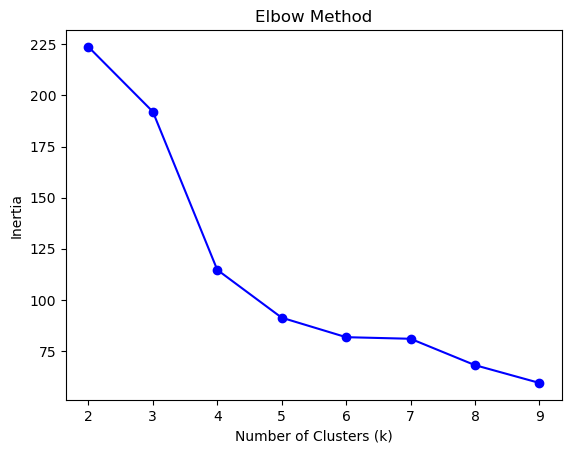

In [4]:
# find optimal number of clusters using elbow

inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)  # ✅ use k here, not K
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(list(K), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [6]:
# using sillhouette score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.580
k=3, silhouette score=0.479
k=4, silhouette score=0.387
k=5, silhouette score=0.347
k=6, silhouette score=0.336
k=7, silhouette score=0.269
k=8, silhouette score=0.316
k=9, silhouette score=0.299


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [14]:
#3. PCA for 2D projection
pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scaled)

plt.figure(figsize=(12,5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'PCA2')

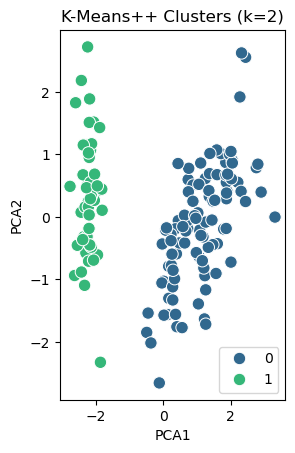

In [15]:
#4 clustering with k=2, k=4

#when k=2
#---k-means with k-means++ initialization---

kmeans2 = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10, random_state=42)
labels2 = kmeans2.fit_predict(x_scaled)

plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced[:,0], y= reduced[:,1], hue=labels2, palette= 'viridis', s=80)
plt.title('K-Means++ Clusters (k=2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


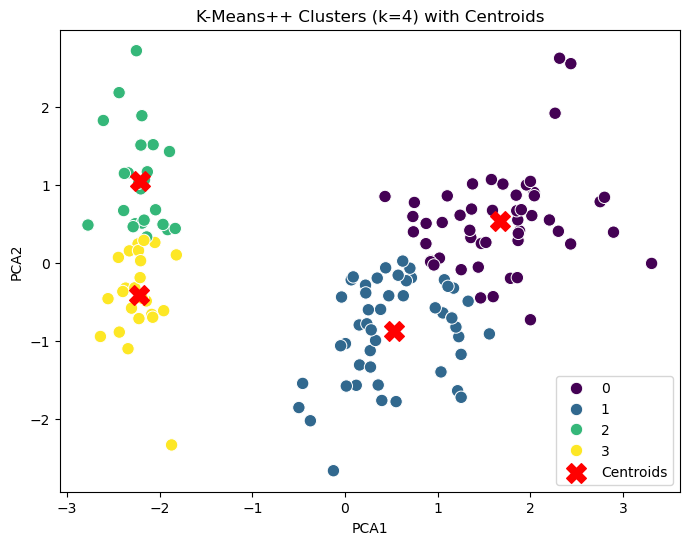

In [18]:
#5. k=4

kmeans4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels4 = kmeans4.fit_predict(x_scaled)

#adding cluster labels to dataframe
df['cluster'] = labels4

# PCA for 2D visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(x_scaled)
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]


# Plot clusters with centers
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='viridis', s=80)
plt.scatter(pca.transform(kmeans4.cluster_centers_)[:, 0], 
            pca.transform(kmeans4.cluster_centers_)[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means++ Clusters (k=4) with Centroids')
plt.legend()
plt.show()



In [24]:
#6. match clusters to real Iris species

pd.crosstab(df['cluster'], df['species'])

species,setosa,versicolor,virginica
cluster,,,
0,0,12,39
1,0,38,11
2,24,0,0
3,26,0,0


In [27]:
#7. renaming cluster

cluster_map ={
    0: 'Virginica',
    1: 'Versicolor',
    2: 'Setosa',
    3: 'Cloned'
}

df['cluster_name'] = df['cluster'].map(cluster_map)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,PCA1,PCA2,cluster_name
0,5.1,3.5,1.4,0.2,setosa,2,-2.264542,0.505704,Setosa
1,4.9,3.0,1.4,0.2,setosa,3,-2.086426,-0.655405,Cloned
2,4.7,3.2,1.3,0.2,setosa,3,-2.367950,-0.318477,Cloned
3,4.6,3.1,1.5,0.2,setosa,3,-2.304197,-0.575368,Cloned
4,5.0,3.6,1.4,0.2,setosa,2,-2.388777,0.674767,Setosa


In [30]:
# summary table

summary = (
    df.groupby('cluster_name')
      [['sepal_length','sepal_width','petal_length','petal_width']]
      .mean()
      .round(2)
)
print(summary)


              sepal_length  sepal_width  petal_length  petal_width
cluster_name                                                      
Cloned                4.77         3.14          1.46         0.21
Setosa                5.26         3.72          1.47         0.28
Versicolor            5.78         2.65          4.33         1.38
Virginica             6.73         3.08          5.46         1.96


# Short Summary

The Iris dataset was clustered using the K-Means++ algorithm to group flowers without labels. After scaling the numeric features and applying the elbow and silhouette methods, four clusters (k=4) were chosen. PCA was used to visualize the clusters in 2D space.

Comparing clusters to the real species showed that Setosa, Versicolor, and Virginica were well separated, with a fourth “Cloned” group emerging as a Setosa sub-cluster. The summary of averages confirmed Setosa had the smallest petals, Virginica the largest, and Versicolor was intermediate.

Overall, K-Means++ effectively reproduced the natural Iris groupings while revealing an additional subtle pattern within Setosa.